In [ ]:
!pip install gdown

In [ ]:
import gdown
url = 'https://drive.google.com/file/d/1Svntr7ZidKtoL1iMtZwR5rA_7MZVT07r/view?usp=drive_link'
output_path = 'diabetes.csv'
gdown.download(url, output_path, quiet=False,fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1Svntr7ZidKtoL1iMtZwR5rA_7MZVT07r
To: /content/diabetes.csv
100%|██████████| 3.81M/3.81M [00:00<00:00, 80.8MB/s]


'diabetes.csv'

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from mlxtend.preprocessing import minmax_scaling
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

In [ ]:
diabetes = pd.read_csv('diabetes.csv')

diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


**Categoricos:**
*Nominales:*

*  Gender
*  Smoking History
*  Diabetes
*  Ordinales:
_

**Numericos:**
*Intervalo:*
*  Blood Glucose Level

*Ratio:*
*  Age
*  Hypertension
*  Heart Disease
*  BMI
*  HbA1c Level

<ipython-input-69-b95291476bbc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(diabetes.corr(), ax = ax, annot = True)


<Axes: >

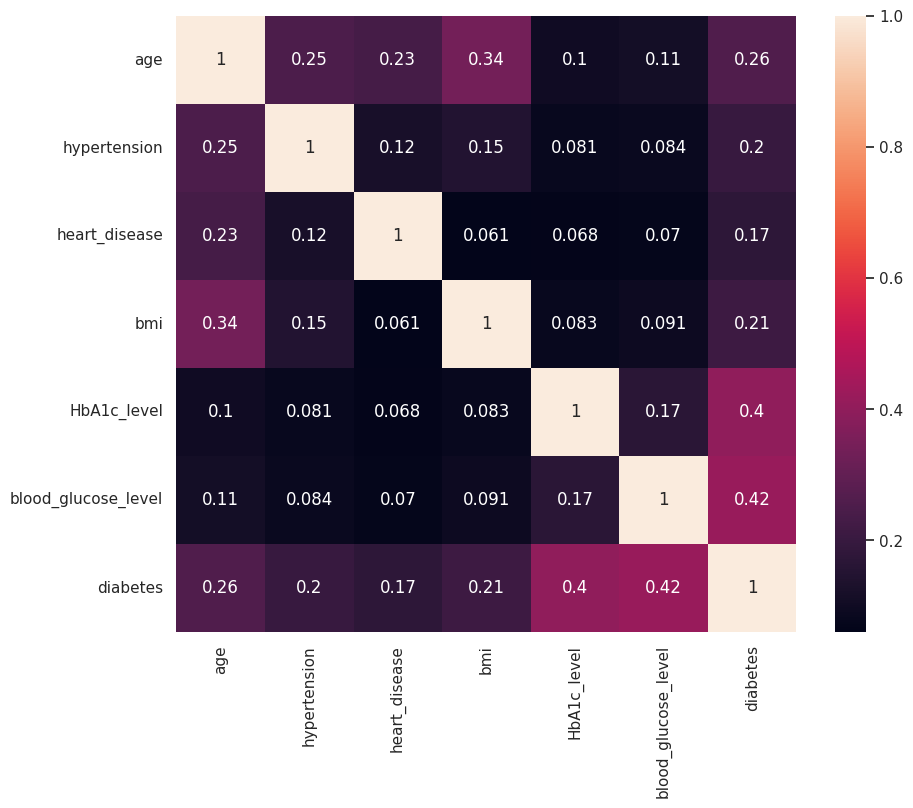

In [ ]:
fig , ax = plt.subplots(figsize = (10,8))
sns.heatmap(diabetes.corr(), ax = ax, annot = True)

La variable con mas peso respecto a la variable objetivo es la glucosa en sangre (blood_glucose_level) seguido por la hemoglobina glicada (HbA1c_level)

###Metricas que se deben usar:


*   Elemento de la lista
*   Elemento de la lista



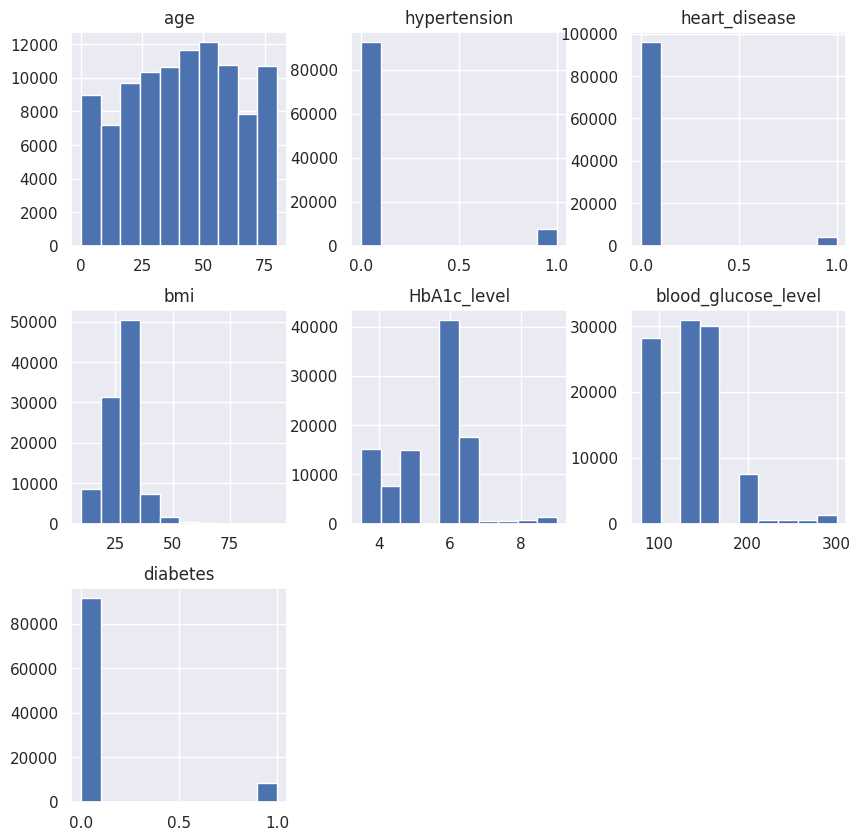

In [ ]:
diabetes.hist(figsize = (10,10))
plt.show()

### Edad

Al observar el histograma correspondiente a la edad se percive que los datos fueron tomados a un grupo de personas dese recién nacidos a personas de avansada
edad.

### Hypertension - Heart_disease

En los histogramas de la hipertensión y cardiopatía podemos observar que la mayor parte de los datos tomados corresponden a personas que no presentan estas afecciones.

### BMI
En el histograma que representa la masa corporal en los datos tenemos que una gran parte de las personas presenntan sobrepeso.

###  HbA1c_level -  Blood_glucose_level

En el histogramas de porciento de glucosa en sangre  y  y en el de nivel de glucosa en sengre podemos observar que existen personas con registros que sobrepasan la media de los valores.

### Resultado

Al observar el grafico que nos muestra los resultados aproximadamente el 10% de la población pertenece a la clase 1 (presenta diabetes) . un dato que se asemeja bastante a lo qu sucede en la realidad.


<Axes: xlabel='smoking_history', ylabel='diabetes'>

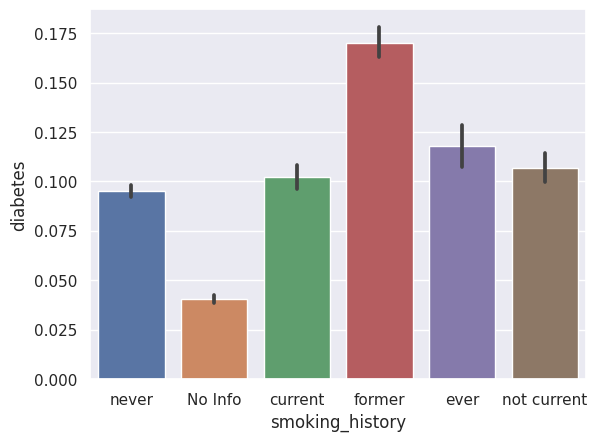

In [ ]:
sns.barplot(x = diabetes.smoking_history, y = diabetes.diabetes)

Al parecer no tiene correlacion directa ser fumador con la diabetes

In [ ]:
def plot_density_bin(data,target,fig_size=(12,8), num_cols=3, num_rows=3):

    sns.set(style="darkgrid")
    plt.subplots(num_rows,num_cols,figsize=fig_size)

    for idx, col in enumerate(data.columns):
        ax = plt.subplot(num_rows,num_cols,idx+1)
        ax.yaxis.set_ticklabels([])
        fig = sns.kdeplot(data.loc[data[target] == 0][col], color="b", linestyle='--',fill=True, warn_singular=False)
        fig = sns.kdeplot(data.loc[data[target] == 1][col], color="r",fill=True,  warn_singular=False)
        ax.legend(labels=['No Diabetes','Diabetes'])


    plt.show()

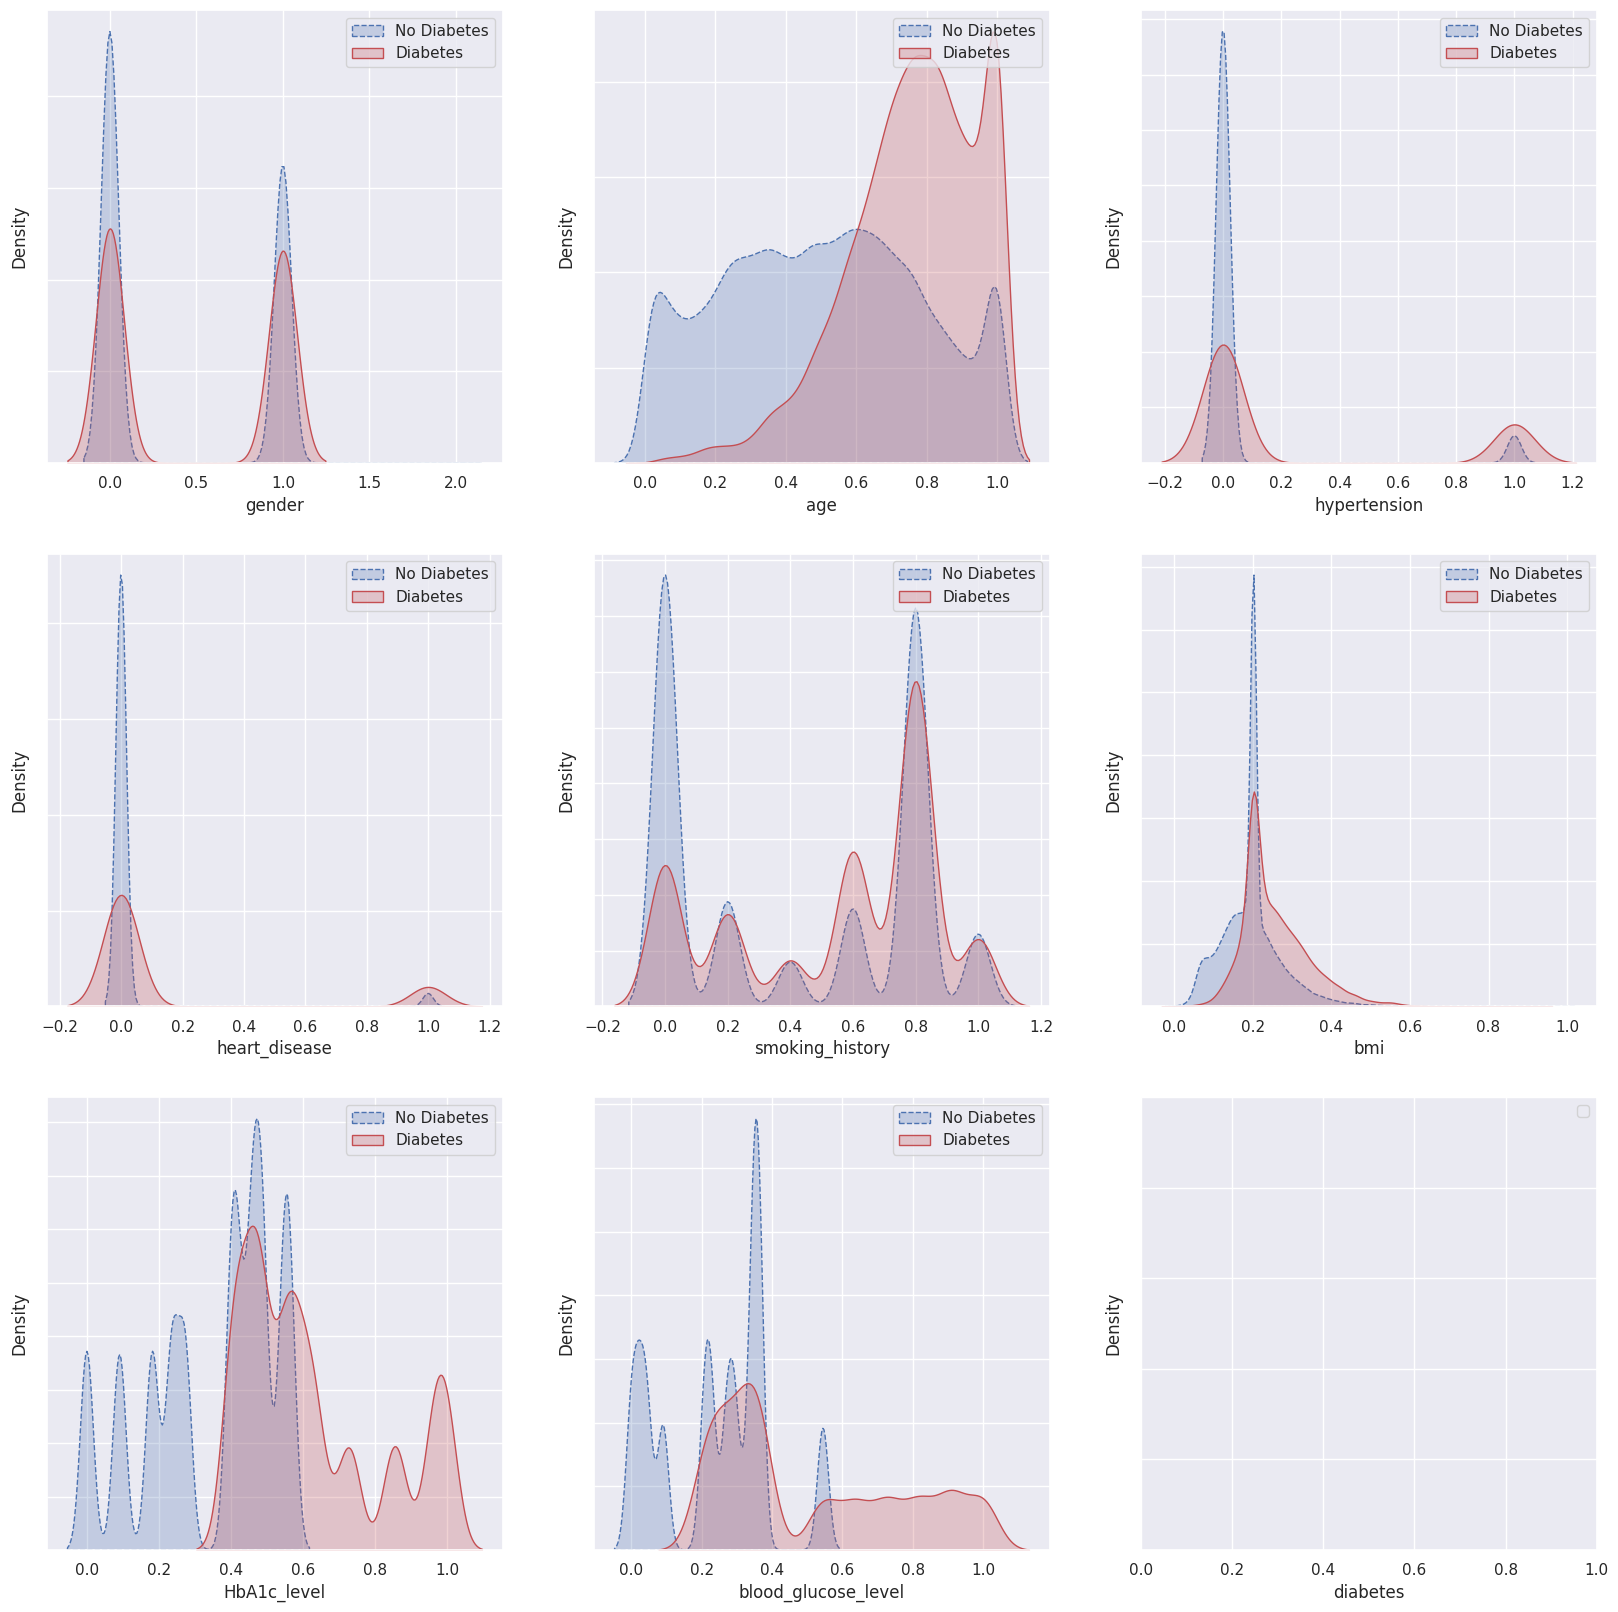

In [ ]:
plot_density_bin(diabetes, 'diabetes', fig_size=(20,20))

considerando el tipo de problema y la correlacon de los datos, las metricas mas adecuadas a aplicar serian la recall, F1-score y presicion score

##Conclusiones:
*  los atributos son mayormente numericos, por lo que transformaremos los valores categoricos en en tipo antes mencionado utilizando one label encoding
*  los atributos myormente se encuentran en un rango de 0 a 1, por o que bmi, age, blood_glucose_level, hba1c_level seran escalados
*  la clase objetivo se considera desbalanceada debido a su alto contenido de negativos y bajo de positivos, es por eso que se decidio aplicar presicion y f1-score
*  se decidio usar recall por su capacidad de evaluar si el modelo es capaz de identificar correctamente los casos positivos,  presicion para evaluar la presicion de ambos positivos y negativos y luego f1-score para una vision mas  general de las metricas anteriores


#Procesando los datos

In [ ]:
diabetes.isnull().any()

gender                 False
age                    False
hypertension           False
heart_disease          False
smoking_history        False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
diabetes               False
dtype: bool

In [ ]:
#escalando los datos
diabetes['age'] = minmax_scaling( diabetes['age'], columns=[0])
diabetes['HbA1c_level'] = minmax_scaling( diabetes['HbA1c_level'], columns=[0])
diabetes['bmi'] = minmax_scaling( diabetes['bmi'], columns=[0])
diabetes['blood_glucose_level'] = minmax_scaling( diabetes['blood_glucose_level'], columns=[0])


/usr/local/lib/python3.10/dist-packages/mlxtend/preprocessing/scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]


In [ ]:
#label encoding smoking_history and gender
le = LabelEncoder()

# Label encode the 'smoking_history' column
diabetes['smoking_history'] = le.fit_transform(diabetes['smoking_history'])
diabetes['gender'] = le.fit_transform(diabetes['gender'])

diabetes['smoking_history'] = minmax_scaling( diabetes['smoking_history'], columns=[0])
diabetes.head()

/usr/local/lib/python3.10/dist-packages/mlxtend/preprocessing/scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.000000,0,1,0.8,0.177171,0.563636,0.272727,0
1,0,0.674675,0,0,0.0,0.202031,0.563636,0.000000,0
2,1,0.349349,0,0,0.8,0.202031,0.400000,0.354545,0
3,0,0.449449,0,0,0.2,0.156863,0.272727,0.340909,0
4,1,0.949950,1,1,0.2,0.118231,0.236364,0.340909,0


##Conclusiones:
* se realizo una normalizacion a los datos con intervalos amplios de modo que queden en un rango de 0 a 1
* se  utilizo label encoding para trasformar los datos categoricos  

#Implementando los modelos

In [ ]:
#seleccionando la variable objetivo
y = diabetes.diabetes

#seleccionando caracteristicas

features = ['gender',	'age',	'hypertension',	'heart_disease',	'smoking_history',	'bmi', 'HbA1c_level',	'blood_glucose_level']
X= diabetes[features]

In [ ]:

X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(X, y, test_size=0.2, random_state=1)

#implementing a desition tree
diabetes_model_desicionTree = DecisionTreeClassifier(random_state=1)
diabetes_model_desicionTree.fit(X_train_DT, y_train_DT)


y_pred_model1 = diabetes_model_desicionTree.predict(X_test_DT)

In [ ]:
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X, y, test_size=0.2, random_state=1)

#implementing logistic regresion
diabetes_model_logisticRegresion = LogisticRegression()
diabetes_model_logisticRegresion.fit(X_train_LR,y_train_LR)


y_pred_model2 = diabetes_model_logisticRegresion.predict(X_test_LR)

##Apicando metricas

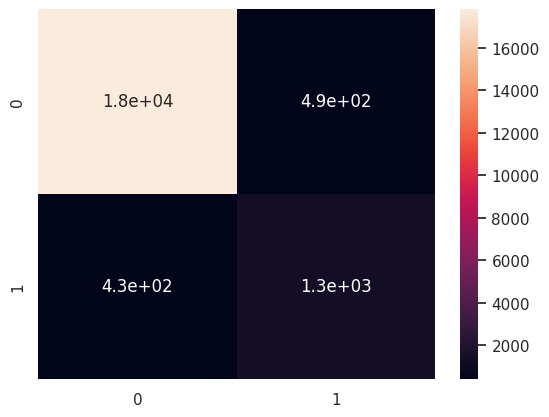

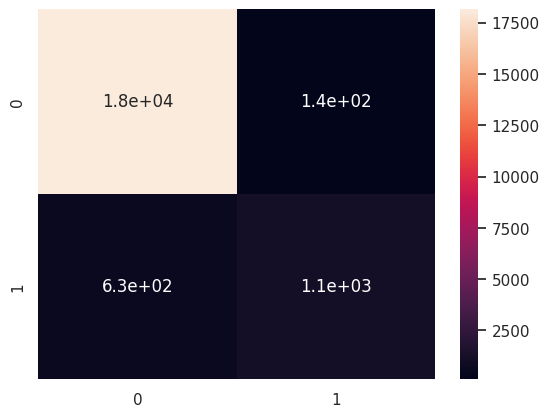

In [ ]:

def graficar_matriz_confusion(actual_data,prediccion):

    matriz_confusion = confusion_matrix(actual_data, prediccion)

    sns.heatmap(matriz_confusion, annot=True)

    plt.show()

graficar_matriz_confusion(y_test_DT, y_pred_model1)
graficar_matriz_confusion(y_test_LR, y_pred_model2)

In [ ]:
report_1 = classification_report(y_test_DT, y_pred_model1)
report_2 = classification_report(y_test_LR, y_pred_model2)
print(report_1)
print(report_2)



              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18299
           1       0.72      0.75      0.73      1701

    accuracy                           0.95     20000
   macro avg       0.85      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18299
           1       0.88      0.63      0.73      1701

    accuracy                           0.96     20000
   macro avg       0.92      0.81      0.86     20000
weighted avg       0.96      0.96      0.96     20000



El modelo de regresion logistica tiene una precisión menor en la detección de la clase 1 (0.88) en comparación con el modelo de arbol de decision (0.72). Sin embargo, el segundo modelo tiene una mayor tasa de verdaderos positivos (recall) para la clase 1 (0.63) que el primer modelo (0.75).

En general, la regrecion logistica parece ser mejor para detectar la clase 0, mientras que el arbol de desicion es mejor para detectar la clase 1. La precisión general del segundo modelo es ligeramente mayor que la del primer modelo (0.96 frente a 0.95), pero esto se debe principalmente a su capacidad para detectar la clase 0.

##Conclusiones:
 en las metricas se puede observar que los modelos presentan una mayor presicion a la hora de detectar negativos, ambos con resultados similares con una ligera ventaja por parte de la regresion logistica